# Lab 5: Simulations

**Attention:**

1. The noteook:
    1. Use **Jupyter Notebook** as instructed. We do not have the resources to support <font color="darkred">**Anaconda**</font>. 
    2. Provide your answers in the designated spaces.
    3. Do not reassign variables in the notebooks! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on (e.g., as an intermediate variable). Otherwise, you will fail the tests that you thought you were passing previously!
2. Grading:
    1. Points will be scaled in Canvas.
    2. Most "tests" in this assignment test the **format and data types** of your answers, not their **correctness**. Passing **100%** of the **tests** does not mean your **grade** will be 100%.
3. Academic honor:
    1. Academic honor is important: **DO NOT CHEAT!** 
    2. <font color='darkred'>**Use AI to LEARN, not to cheat**. **DO NOT copy-n-paste**</font>: You will be competing with people who are as good as you in AI, and you will have the competitive edge when you are one of the few who know how to do things without AI. 
    3. Collaboration and using resources are encouraged, but DO NOT directly share answers. Upon typing up answers, do it yourself. 
4. Getting help:
    1. Come to the TA's help sessions and the instructor's office hours for help and clarification.
    2. Text a screenshot of your technical issue to the instructor.
    3. Emailing the instructor and the TA. (Emailing is too slow for technical problem-solving, so do not expect quick responses.)
5. <font color="darkred">**Time management**</font>: Start early in the assignment cycle and allot enough time for it.

**Reference Materials**:
- The [Python Reference sp25](https://www.data8.org/sp24/reference/) or [Python Reference sp24](https://www.data8.org/sp24/reference/).
- The [Data8 datascience Reference](https://www.data8.org/datascience/tables.html) is very helpful with **syntax and examples**. For example, the [Table Functions and Methods](https://www.data8.org/datascience/reference-nb/datascience-reference.html) and [Tables](https://www.data8.org/datascience/tables.html)
- The data used in this lab will contain salary data and other statistics for basketball players from the 2014-2015 NBA season. This data was collected from the following sports analytic sites: [Basketball Reference](http://www.basketball-reference.com) and [Spotrac](http://www.spotrac.com).

**Recommended Readings**: 

* [randomness](https://introdsm.org/chapters/09/Randomness.html).
* [iteration](https://introdsm.org/chapters/09/2/Iteration.html)
* [simulations](https://introdsm.org/chapters/09/3/Simulation.html)



In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab05.ipynb")

In [2]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
### to learn more about the magic commands, run %magic. (note not all the commands work)
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## 1. Nachos and Conditionals

In Python, the boolean is a data type with only two possible values:  `True` and `False`. Expressions containing comparison operators such as `<` (less than), `>` (greater than), and `==` (equal to) evaluate to Boolean values. A list of common comparison (relational) operators can be found below!

<img src="comparisons.png" alt="Chart of comparison operators">

Run the cell below to see an example of a comparison operator in action.

In [3]:
3 > (1 + 1)

True

We can even assign the result of a comparison operation to a variable. Note that `==` and `=` are **not** the same!

In [4]:
### note that we don't even have parentheses around the expression

result = 10 / 2 == 5
result

True

Just like arithmetic operators can be applied on every item of an array, comparison operators can also be used on arrays to compare an entire array with some value. The output of this comparison is an array of boolean values.

In [5]:
### the expression of make_array evaluate to an array, which is then compared to 3

make_array(1, 5, 7, 8, 3, -1) > 3

array([False,  True,  True,  True, False, False], dtype=bool)

One day, when you come home after a long week, you see a hot bowl of nachos waiting on the dining table! Let's say that whenever you take a nacho from the bowl, it will either have only **cheese**, only **salsa**, **both** cheese and salsa, or **neither** cheese nor salsa (a sad tortilla chip indeed). 

Let's try and simulate taking nachos from the bowl at random using the function, `np.random.choice(...)`.

### `np.random.choice`

`np.random.choice` picks one item at random from the given array. It is equally likely to pick any of the items. Run the cell below several times, and observe how the results change. _Tip:_ To keep running a cell multiple times you can use the keyboard shortcut `ctrl` + `return`. 

In [12]:
nachos = make_array('cheese', 'salsa', 'both', 'neither')
np.random.choice(nachos)

'neither'

To repeat this process multiple times, pass in an int `n` as the second argument to return `n` different random choices. By default, `np.random.choice` samples **with replacement** and returns an *array* of items. Sampling **with replacement** means that after an element is drawn, it is replaced back to where you are sampling from and can be drawn again in the future. If we sample `n` times with replacement, each time, every element has an equal chance of being selected.

Run the next cell to see an example of sampling with replacement 10 times from the `nachos` array.

In [19]:
np.random.choice(nachos, 10)   ### nachos has only 4 elements but we replace

array(['both', 'both', 'both', 'cheese', 'cheese', 'cheese', 'salsa',
       'neither', 'cheese', 'both'],
      dtype='<U7')

To count the number of times a certain type of nacho is randomly chosen, we can use `np.count_nonzero`

### `np.count_nonzero`

`np.count_nonzero` counts the number of non-zero values that appear in an array. When an array of boolean values are passed through the function, it will count the number of `True` values (remember that in Python, **`True` is coded as 1 and `False` is coded as 0.**)

Run the next cell to see an example that uses `np.count_nonzero`.

In [26]:
np.count_nonzero(make_array(True, False, False, True, True))

3

**Question 1.1** Assume we took ten nachos at random, and stored the results in an array called `ten_nachos` as done below. **Find the number of nachos with only cheese using code** (do not manually enter the final answer).  

*Hint:* Our solution involves a comparison operator (e.g. `==`, `<`, ...) and the `np.count_nonzero` method.


In [27]:
### again, array elements are compared and return an array; here to be counted

ten_nachos = make_array('neither', 'cheese', 'both', 'both', 'cheese', 'salsa', 'both', 'neither', 'cheese', 'both')
number_cheese = np.count_nonzero(ten_nachos == 'cheese')
number_cheese

3

In [28]:
grader.check("q11")

q11 results: All test cases passed!

**Conditional Statements**

A conditional statement is a multi-line statement that allows Python to choose among different alternatives based on the truth value of an expression.

Here is a basic example.

```python
def sign(x):
    if x > 0:
        return 'Positive'
    else:
        return 'Negative'
```

If the input `x` is greater than `0`, we return the string `'Positive'`. Otherwise, we return `'Negative'`.

If we want to test multiple conditions at once, we use the following general format.

```python
if <if expression>:
    <if body>
elif <elif expression 0>:
    <elif body 0>
elif <elif expression 1>:
    <elif body 1>
...
else:
    <else body>
```

Only the body for the first conditional expression that is true will be evaluated. Each `if` and `elif` expression is evaluated and considered in order, starting at the top. `elif` can only be used if an `if` clause precedes it. As soon as a true value is found, the corresponding body is executed, and the rest of the conditional statement is skipped. If none of the `if` or `elif` expressions are true, then the `else body` is executed. 

For more examples and explanation, refer to the section on conditional statements [here](https://inferentialthinking.com/chapters/09/1/Conditional_Statements.html).

**Question 1.2** Complete the following conditional statement so that the string `'More please'` is assigned to the variable `say_please` if the number of nachos with cheese in `ten_nachos` is less than `5`. Use the if statement to do this (do not directly reassign the variable `say_please`). 

*Hint*: You should be using `number_cheese` from Question 1.


In [30]:
say_please = '?'

if np.count_nonzero(ten_nachos == 'cheese') < 5:
    say_please = 'More please'
say_please

'More please'

In [31]:
grader.check("q12")

q12 results: All test cases passed!

**Question 1.3** Write a function called `nacho_reaction` that returns a reaction (as a string) based on the type of nacho passed in as an argument. Use the table below to match the nacho type to the appropriate reaction.

|Nacho Type|Reaction|
|---|---|
|cheese|Cheesy!|
|salsa|Spicy!|
|both|Wow!|
|neither|Meh.|

*Hint:* If you're failing the test, double check the spelling of your reactions.


In [32]:
def nacho_reaction(nacho):
    if nacho == "cheese":
        return 'Cheesy!'
    if nacho == "salsa" :
        return 'Spicy!'
    if nacho == "both" :
        return 'Wow!'
    if nacho == "neither" :
        return 'Meh.'

spicy_nacho = nacho_reaction('salsa')
spicy_nacho

'Spicy!'

In [33]:
grader.check("q13")

q13 results: All test cases passed!

**Question 1.4** Create a table `ten_nachos_reactions` that consists of the nachos in `ten_nachos` as well as the reactions for each of those nachos. The columns should be called `Nachos` and `Reactions`.

*Hint:* Consider using the `apply` method, which returns an array.


In [35]:
ten_nachos_tbl = Table().with_column('Nachos', ten_nachos)
ten_nachos_reactions = ten_nachos_tbl.with_column('Reactions', ten_nachos_tbl.apply(nacho_reaction, 'Nachos'))
ten_nachos_reactions

Nachos,Reactions
neither,Meh.
cheese,Cheesy!
both,Wow!
both,Wow!
cheese,Cheesy!
salsa,Spicy!
both,Wow!
neither,Meh.
cheese,Cheesy!
both,Wow!


In [36]:
grader.check("q14")

q14 results: All test cases passed!

**Question 1.5** Using code, find the number of 'Wow!' reactions for the nachos in `ten_nachos_reactions`.


In [37]:
# ten_nachos_reactions.column('Reactions') == 'Wow!'

In [38]:
number_wow_reactions = np.count_nonzero(ten_nachos_reactions.column('Reactions') == 'Wow!')
number_wow_reactions

4

In [39]:
grader.check("q15")

q15 results: All test cases passed!

## 2. Simulations and For Loops
Using a `for` statement, we can perform a task multiple times. This is known as iteration. The general structure of a for loop is:

`for <placeholder> in <array>:` followed by indented lines of code that are repeated for each element of the `array` being iterated over. You can read more about for loops [here](https://www.inferentialthinking.com/chapters/09/2/Iteration.html). 

**NOTE:** We often use `i` as the `placeholder` in our class examples, but you could name it anything! Some examples can be found below.

One use of iteration is to loop through a set of values. For instance, we can print out all of the colors of the rainbow.

In [40]:
rainbow = make_array("red", "orange", "yellow", "green", "blue", "indigo", "violet")

for color in rainbow:
    print(color, end=", ")

red, orange, yellow, green, blue, indigo, violet, 

We can see that the indented part of the `for` loop, known as the body, is executed once for each item in `rainbow`. The name `color` is assigned to the next value in `rainbow` at the start of each iteration. Note that the name `color` is arbitrary; we could easily have named it something else. Whichever name we pick, we need to use it consistently throughout the `for` loop. 

In [42]:
for another_name in rainbow:
    print(another_name)

red
orange
yellow
green
blue
indigo
violet


In general, however, we would like the variable name to be somewhat informative. 

**Question 2.1** In the following cell, we've loaded the text of _Pride and Prejudice_ by Jane Austen, split it into individual words, and stored these words in an array `p_and_p_words`. Using a `for` loop, assign `longer_than_five` to the number of words in the novel that are more than 5 letters long.

*Hint*: You can find the number of letters in a word with the `len` function.

*Hint*: How can you use `longer_than_five` to keep track of the number of words that are more than five letters long?


In [43]:
### check to see the book content and what split() does to the words

austen_string = open('Austen_PrideAndPrejudice.txt', encoding='utf-8').read()
p_and_p_words = np.array(austen_string.split())

longer_than_five = 0

for word in p_and_p_words:
    if len(word) > 5:
        longer_than_five += 1
longer_than_five

35453

In [109]:
# p_and_p_words
# longer_than_five

In [110]:
grader.check("q21")

q21 results: All test cases passed!

Another way we can use `for` loops is to repeat lines of code many times. Recall the structure of a `for` loop: 

`for <placeholder> in <array>:` followed by indented lines of code that are repeated for each element of the array being iterated over. 

Sometimes, we don't care about what the value of the placeholder is. We instead take advantage of the fact that the `for` loop will repeat as many times as the length of our array. In the following cell, we iterate through an array of length 5 and print out "Hello, world!" in each iteration, but we don't need to use the placeholder `i` in the body of our `for` loop. 

In [111]:
for i in np.arange(5):
    print("Hello, world!")

Hello, world!
Hello, world!
Hello, world!
Hello, world!
Hello, world!


**Question 2.2** Using a simulation with 10,000 trials, assign `num_different` to the **number** of times, in 10,000 trials, that two words picked uniformly at random (with replacement) from Pride and Prejudice have different lengths. 

*Hint 1*: What function did we use in section 1 to sample at random with replacement from an array? 

*Hint 2*: Remember that `!=` checks for non-equality between two items.


In [15]:
### is np.random.choice() replacement=true by default?
import numpy as np
trials = 10000
num_different = 0

for i in range(trials):
    if len(np.random.choice(p_and_p_words, replace=True)) != len(np.random.choice(p_and_p_words, replace=True)):
        num_different += 1
num_different

8630

In [16]:
grader.check("q22")

q22 results: All test cases passed!

## 3. Sampling Basketball Data

We will now introduce the topic of sampling, which we’ll be discussing in more depth in this week’s lectures. We’ll guide you through this code, but if you wish to read more about different kinds of samples before attempting this question, you can check out [section 10 of the textbook](https://www.inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html).

Run the cell below to load player and salary data that we will use for our sampling. 

In [3]:
player_data = Table().read_table("player_data.csv")
salary_data = Table().read_table("salary_data.csv")
full_data = salary_data.join("PlayerName", player_data, "Name")

# The show method immediately displays the contents of a table. 
# This way, we can display the top of two tables using a single cell.
player_data.show(3)
salary_data.show(3)
full_data.show(3)

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
James Harden,25,HOU,81,459,565,154,60,321,2217
Chris Paul,29,LAC,82,376,838,156,15,190,1564
Stephen Curry,26,GSW,80,341,619,163,16,249,1900


PlayerName,Salary
Kobe Bryant,23500000
Amar'e Stoudemire,23410988
Joe Johnson,23180790


PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
A.J. Price,62552,28,TOT,26,32,46,7,0,14,133
Aaron Brooks,1145685,30,CHI,82,166,261,54,15,157,954
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243


Rather than getting data on every player (as in the tables loaded above), imagine that we had gotten data on only a smaller subset of the players. For 492 players, it's not so unreasonable to expect to see all the data, but usually we aren't so lucky. 

If we want to make estimates about a certain numerical property of the population, we may have to come up with these estimates based only on a smaller sample. The numerical property of the population is known as a **parameter**, and the estimate is known as a **statistic** (e.g. the mean or median). Whether these estimates are useful or not often depends on how the sample was gathered. We have prepared some example sample datasets to see how they compare to the full NBA dataset. Later we'll ask you to create your own samples to see how they behave.

To save typing and increase the clarity of your code, we will package the analysis code into a few functions. This will be useful in the rest of the lab as we will repeatedly need to create histograms and collect summary statistics from that data.

We've defined the `histograms` function below, which takes a table with columns `Age` and `Salary` and draws a histogram for each one. It uses bin widths of 1 year for `Age` and $1,000,000 for `Salary`.

Two histograms should be displayed below


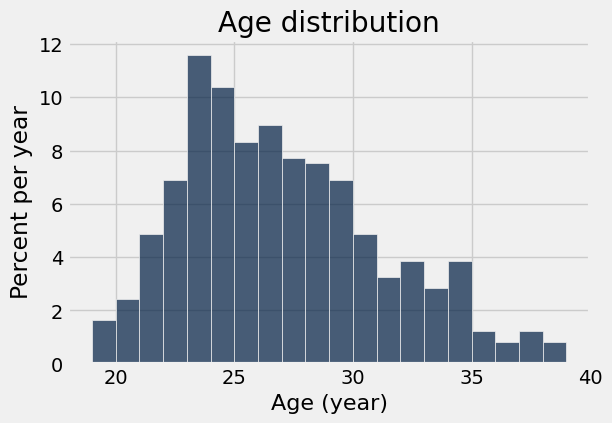

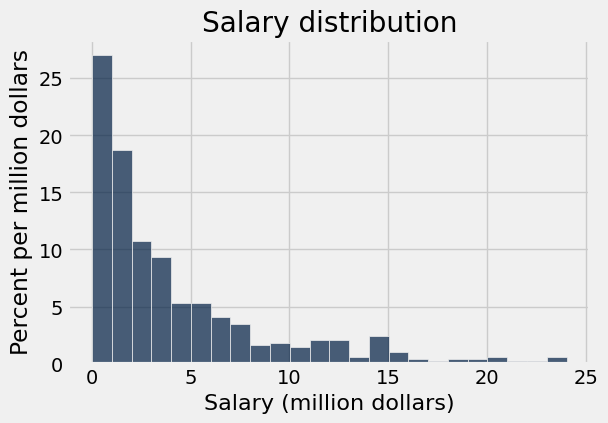

In [4]:
def histograms(t):
    ages = t.column('Age')
    salaries = t.column('Salary')/1000000
    t1 = t.drop('Salary').with_column('Salary', salaries)
    age_bins = np.arange(min(ages), max(ages) + 2, 1) 
    salary_bins = np.arange(min(salaries), max(salaries) + 1, 1)
    t1.hist('Age', bins=age_bins, unit='year')
    plt.title('Age distribution')
    t1.hist('Salary', bins=salary_bins, unit='million dollars')
    plt.title('Salary distribution') 
    
histograms(full_data)
print('Two histograms should be displayed below')

**Question 3.1**. Create a function called `compute_statistics` that takes a table containing an "Age" column and a "Salary" column and:
- Draws a histogram of ages
- Draws a histogram of salaries
- Returns a two-element array containing the average age and average salary (in that order)

You can call the `histograms` function to draw the histograms!


array([  2.65365854e+01,   4.26977577e+06])

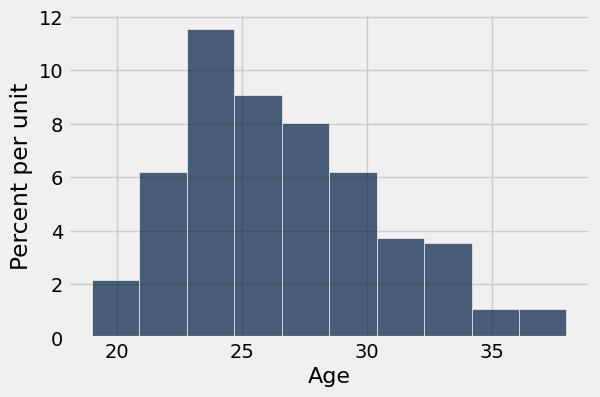

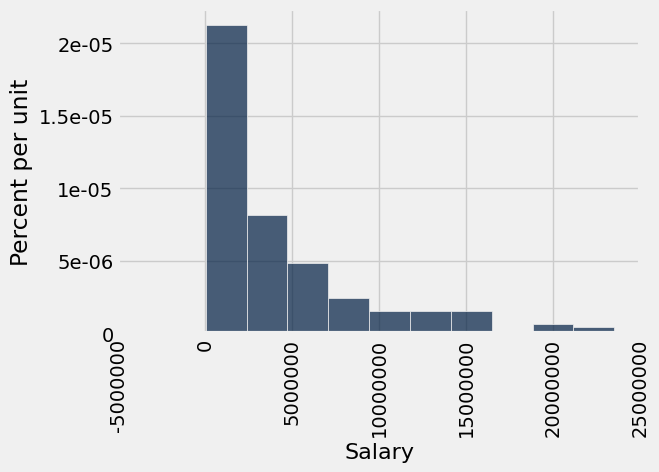

In [196]:
def compute_statistics(age_and_salary_data):

    age_and_salary_data.hist('Age')
    age_and_salary_data.hist('Salary')
    age = age_and_salary_data.column('Age').mean()
    salary = age_and_salary_data.column('Salary').mean()
    return make_array(age, salary)

full_stats = compute_statistics(full_data)
full_stats

# my_small_srswor_data = full_data.sample(44, with_replacement=False)
# my_small_stats = compute_statistics(my_small_srswor_data)
# my_small_stats

In [176]:
# full_data.column('Age').mean()

In [197]:
grader.check("q31")

q31 results: All test cases passed!

### Simple random sampling
A more justifiable approach is to sample uniformly at random from the players.  In a **simple random sample (SRS) without replacement**, we ensure that each player is selected at most once. Imagine writing down each player's name on a card, putting the cards in an box, and shuffling the box.  Then, pull out cards one by one and set them aside, stopping when the specified sample size is reached.

### Producing simple random samples
Sometimes, it’s useful to take random samples even when we have the data for the whole population. It helps us understand sampling accuracy.

### `sample`

The table method `sample` produces a random sample from the table. By default, it draws at random **with replacement** from the rows of a table. Sampling with replacement means for any row selected randomly, there is a chance it can be selected again if we sample multiple times. `Sample` takes in the sample size as its argument and returns a **table** with only the rows that were selected. This differs from `np.random.choice`, which takes an array and outputs a random value from the array.

Run the cell below to see an example call to `sample()` with a sample size of 5, with replacement.

In [17]:
# Just run this cell

salary_data.sample(5)

PlayerName,Salary
Allen Crabbe,862000
Lester Hudson,57726
Corey Brewer,4702500
LeBron James,20644400
Mike Dunleavy,3326235


The optional argument `with_replacement=False` can be passed through `sample()` to specify that the sample should be drawn without replacement.

Run the cell below to see an example call to `sample()` with a sample size of 5, without replacement.

In [24]:
# Just run this cell

salary_data.sample(5, with_replacement=False)

PlayerName,Salary
Shavlik Randolph,1227985
Marcus Morris,2943221
Marreese Speights,3657500
Patrick Christopher,379010
Tyler Johnson,199950


**Question 3.2** Produce a simple random sample **without** replacement of size **44** from `full_data`. Then, run your analysis on it again by using the `compute_statistics` function you defined above.  Run the cell a few times to see how the histograms and statistics change across different samples.

- How much does the average age change across samples? 
- What about average salary?

(FYI: srs = simple random sample, wor = without replacement)

<font color='blue'>_Type your answer here, replacing this text._</font>

<!-- BEGIN QUESTION -->

In [232]:
my_small_srswor_data = full_data.sample(44, with_replacement=False)
my_small_stats = my_small_srswor_data.column('Salary').mean()
my_small_stats

### age = 26; salary: 4 mil

5040087.1590909092

<!-- END QUESTION -->

## 4. More Random Sampling Practice

More practice for random sampling using `np.random.choice`.

###  Simulations and For Loops (cont.)

**Question 4.1** We can use `np.random.choice` to simulate multiple trials.

Stephanie decides to play a game rolling a standard six-sided die, where her score on each roll is determined by the face that is rolled. She wants to know what her total score would be if she rolled the die 1000 times. Write code that simulates her total score after 1000 rolls.

*Hint:* First decide the possible values you can take in the experiment (point values in this case). Then use `np.random.choice` to simulate Stephanie’s rolls. Finally, sum up the rolls to get Stephanie's total score.


In [248]:
possible_point_values = make_array(1, 2, 3, 4, 5, 6)
num_tosses = 1000
simulated_tosses = np.random.choice(possible_point_values, num_tosses, replace=True)
total_score = sum(simulated_tosses)
total_score

3473

In [162]:
# possible_point_values = make_array(1, 2, 3, 4, 5, 6)
# num_tosses = 6000
# total_score = 0
# simulated_tosses = np.random.choice(possible_point_values, num_tosses, replace=True)
# total_score = np.count_nonzero(simulated_tosses == 1)
# total_score

In [249]:
grader.check("q41")

q41 results: All test cases passed!

### Simple random sampling (cont.)

**Question 4.2** As in the previous question, analyze several simple random samples of size 100 from `full_data` by using the `compute_statistics` function.  
- Do the histogram shapes seem to change more or less across samples of 100 than across samples of size 44?  
- Are the sample averages and histograms closer to their true values/shape for age or for salary?  What did you expect to see?

_Type your answer here, replacing this text._

<!-- BEGIN QUESTION -->



array([  2.71100000e+01,   4.84084260e+06])

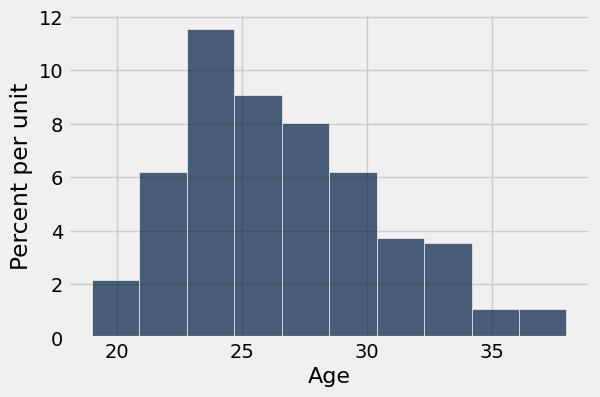

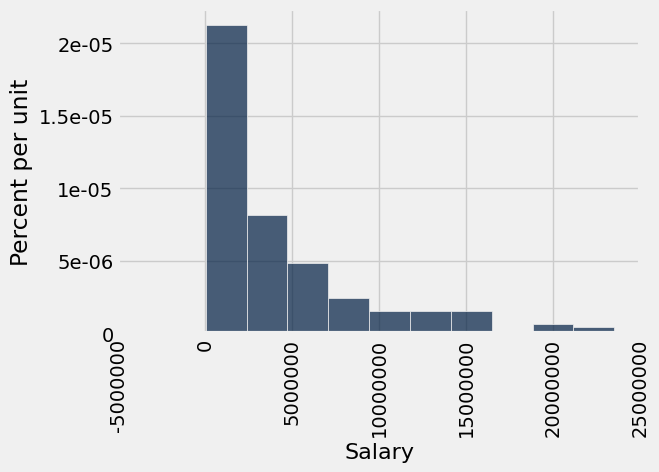

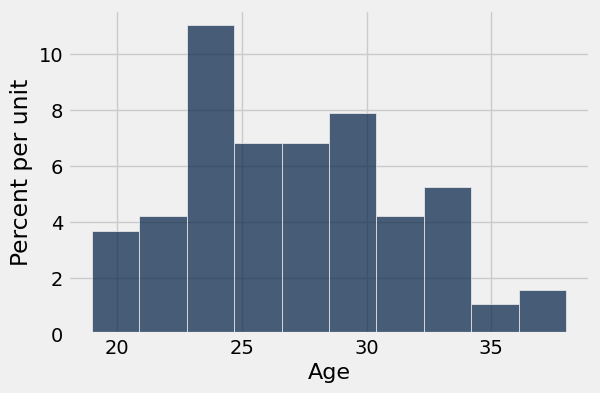

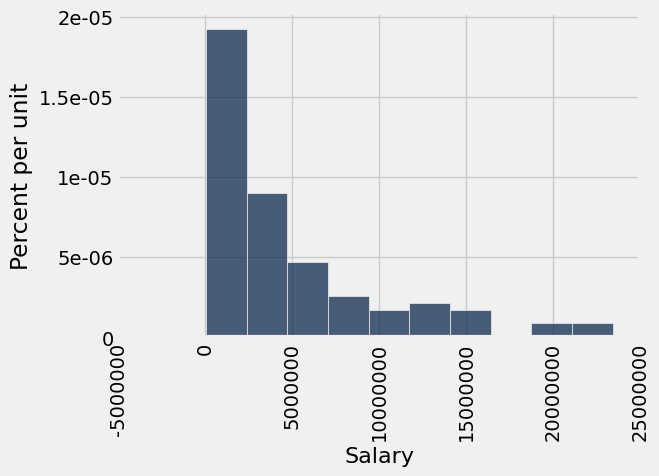

In [254]:
def compute_statistics(age_and_salary_data):

    age_and_salary_data.hist('Age')
    age_and_salary_data.hist('Salary')
    age = age_and_salary_data.column('Age').mean()
    salary = age_and_salary_data.column('Salary').mean()
    return make_array(age, salary)

# my_small_srswor_data = full_data.sample(44, with_replacement=False)
# my_small_stats = my_small_srswor_data.column('Salary').mean()
# my_small_stats
compute_statistics(full_data)

my_large_srswor_data = full_data.sample(100, with_replacement=False)
my_large_stats = my_small_srswor_data.column('Salary').mean()
my_large_stats

compute_statistics(my_large_srswor_data)

<p>&nbsp;</p>

`Good Job! You are done with this assignment!`

## Submission

After you have completed the assignment, do the following to submit it:

1. **Save** the notebook file (File ==> Save Notebook) (or just the Save icon)
2. Go to the notebook menu, choose Kernel ==> **Restart Kernel and Run All Cells**.
3. Scrolling around to make sure everything works fine without unexpected error messages. 
4. **Save** the notebook file (File ==> Save Notebook, or use the Save icon).
5. Use the Jupyter Notebook dashboard/Homepage to create a **duplicate** of this notebook and then **rename** it from *assignment*.ipynb_**copy** (e.g., a01.ipynb_copy) to *assignment_**FIRSTNAME_LASTNAME***.ipynb (e.g., a01_TSANGYAO_CHEN.ipynb) to be graded. That way you will be able to keep your original file.
6. **Upload** your <font color="blue">*assignment_**FIRSTNAME_LASTNAME***.ipynb</font> to Canvas.